## Homework 1
## Julia implementation of Problem 7-10

In [1]:
using PyPlot

function gen_dataset(num_points)
    linpts = 2.0*rand((2,2)) - 1.0
    #targ_weights = [1.0; linpts \ [-1, -1]] # a bit slow
    targ_weights = Float64[
        (linpts[2,1] - linpts[1,1])*linpts[1,1] + (linpts[2,2] - linpts[1,2])*linpts[1,2],
        linpts[2,1] - linpts[1,1],
        linpts[2,2] - linpts[1,2]]
    #points = hcat(ones(num_points),2.0*rand((num_points,2)) - 1.0)
    points = [ones(num_points) (2.0*rand((num_points,2)) - 1.0)]
    labels = sign(points*targ_weights)
    return points, labels, targ_weights
end

function mis_collection(points, labels, weights)
    return find(sign(points*weights) .!= labels)
end

function perceptron(points, labels)
    weights = zeros(3)
    num_iter = 0
    mis_idxs = mis_collection(points, labels, weights)
    while true
        idx = mis_idxs[rand(1:length(mis_idxs))]
        weights += labels[idx] * points[idx,:][:]
        num_iter += 1
        mis_idxs = mis_collection(points, labels, weights)
        if length(mis_idxs) == 0
            break
        end
    end
    
    return weights, num_iter
end

function prob_difference(targ_weights, hypo_weights; num_mcpoints=10000)
    points = [ones(num_mcpoints) (2.0*rand((num_mcpoints,2)) - 1.0)]
    return sum(sign(points*targ_weights) .!= sign(points*hypo_weights)) / num_mcpoints
end

prob_difference (generic function with 1 method)

In [2]:
function plot_pla(points, labels, targ_weights, hypo_weights)

    x11,x12,x21,x22=[], [], [], []
    for idx in 1:size(points)[1]
        if labels[idx] == 1
            push!(x11, points[idx,2])
            push!(x12, points[idx,3])
        else
            push!(x21, points[idx,2])
            push!(x22, points[idx,3])
        end
    end

    fig = figure("perceptron",figsize=(5,5))
    ax = axes()
    xlim(-1, 1)
    ylim(-1, 1)
    scatter(x11, x12, alpha=0.5, color="red")
    scatter(x21, x22, alpha=0.5, color="blue")
    s = linspace(-1,1)
    targ_func(x) = -targ_weights[2]/targ_weights[3]*x - targ_weights[1]/targ_weights[3]
    hypo_func(x) = -hypo_weights[2]/hypo_weights[3]*x - hypo_weights[1]/hypo_weights[3]
    plot(s, targ_func(s), "g-")
    plot(s, hypo_func(s), "y-")
    title("Perceptron")
    xlabel(L"$x_1$")
    ylabel(L"$x_2$")
    grid("on")
end

plot_pla (generic function with 1 method)

In [5]:
function simulate_pla(num_points; num_iterations=1000, num_mcpoints=10000, plot=false)
    iter_sum = 0
    prob_sum = 0.0
    for idx in 1:num_iterations
        points, labels, targ_weights = gen_dataset(num_points)
        weights, num_iter = perceptron(points, labels)
        prob_sum += prob_difference(targ_weights, weights, num_mcpoints=num_mcpoints)
        iter_sum += num_iter
        if plot == true && idx == num_iterations
            plot_pla(points, labels, targ_weights, weights)
         end
    end
    return iter_sum/num_iterations, prob_sum / num_iterations
end

simulate_pla (generic function with 1 method)

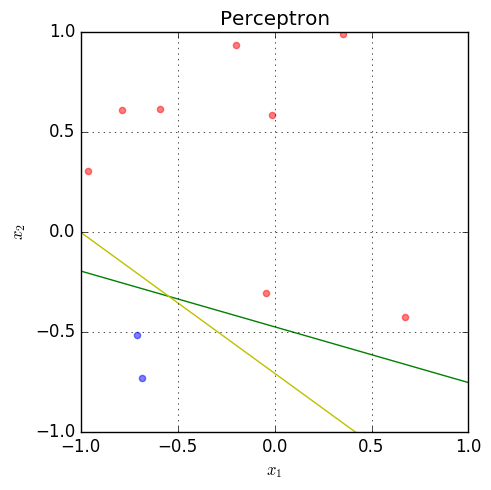

  0.931087 seconds (299.75 k allocations: 1.103 GB, 11.78% gc time)


(9.233,0.09105370000000002)

In [29]:
@time simulate_pla(10, num_iterations=1000, num_mcpoints=10000, plot=true)

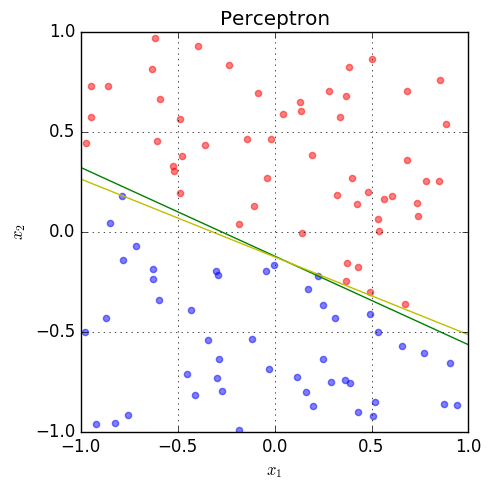

  1.922533 seconds (2.17 M allocations: 1.682 GB, 11.94% gc time)


(94.211,0.01191420000000001)

In [31]:
@time simulate_pla(100, num_iterations=1000, num_mcpoints=10000, plot=true)

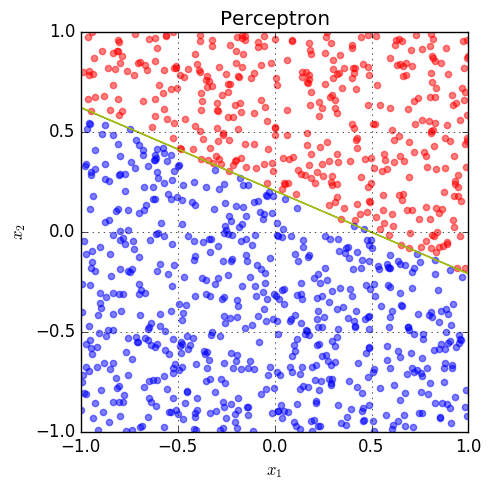

 20.729423 seconds (18.59 M allocations: 15.561 GB, 9.66% gc time)


(711.428,0.0013288999999999946)

In [9]:
@time simulate_pla(1000, plot=true)

In [10]:
@time simulate_pla(100, num_iterations=10000)

 16.979147 seconds (19.58 M allocations: 16.198 GB, 11.55% gc time)


(84.6899,0.012654940000000016)

### The distribution of the number of iterations

In [20]:
using PyPlot

function num_iter_histgram(num_points; num_iterations=1000)
    iter_list = []
    prob_sum = 0.0
    for idx in 1:num_iterations
        points, labels, targ_weights = gen_dataset(num_points)
        weights, num_iter = perceptron(points, labels)
        push!(iter_list, num_iter)
    end
    fig = figure("histogram",figsize=(5,5))
    h = plt[:hist](iter_list,num_iterations/10)
    grid("on")
    title("Histogram of iter_num")
    return iter_list
end

num_iter_histgram (generic function with 1 method)

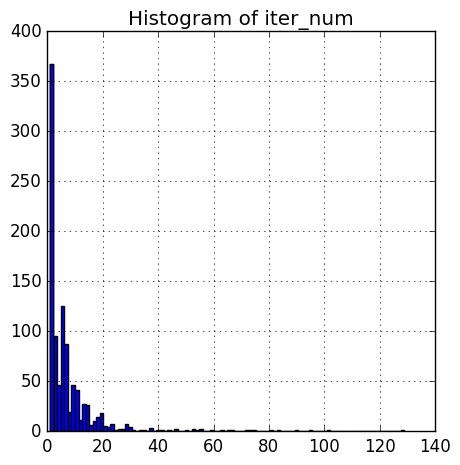

mean:7.565


10-element Array{Any,1}:
 129
 101
  95
  90
  83
  81
  75
  73
  72
  67

In [24]:
iter_list = num_iter_histgram(10, num_iterations=1000)
println("mean:", mean(iter_list))
sort(iter_list, rev=true)[1:10]

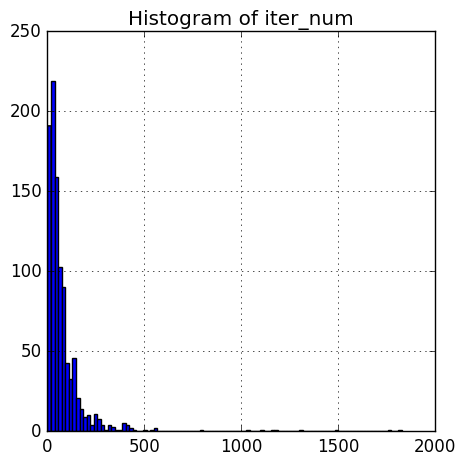

mean:82.552


10-element Array{Any,1}:
 1829
 1771
 1485
 1306
 1189
 1157
 1103
 1036
  805
  561

In [25]:
iter_list = num_iter_histgram(100, num_iterations=1000)
println("mean:", mean(iter_list))
sort(iter_list, rev=true)[1:10]

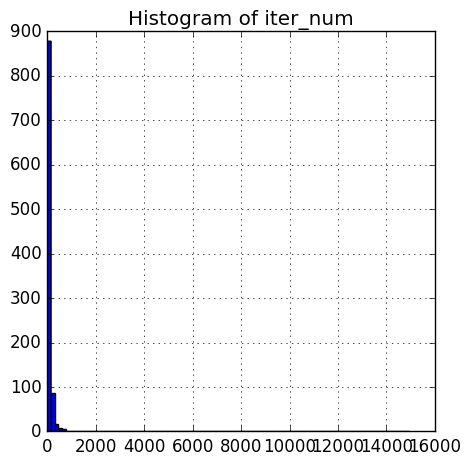

mean:98.934


10-element Array{Any,1}:
 14935
  2442
  1803
  1153
  1049
   819
   727
   688
   655
   649

In [28]:
iter_list = num_iter_histgram(100, num_iterations=1000)
println("mean:", mean(iter_list))
sort(iter_list, rev=true)[1:10]

In [37]:
for _ in 1:100
    @time println(simulate_pla(100, num_iterations=1000))
end

(84.262,0.011976999999999986)
  1.800167 seconds (1.95 M allocations: 1.617 GB, 13.58% gc time)
(77.528,0.012562599999999997)
  1.679946 seconds (1.80 M allocations: 1.573 GB, 14.03% gc time)
(104.057,0.013252399999999987)
  2.023328 seconds (2.38 M allocations: 1.746 GB, 13.30% gc time)
(83.536,0.012450899999999987)
  1.765008 seconds (1.93 M allocations: 1.612 GB, 13.96% gc time)
(89.695,0.012795299999999999)
  1.819518 seconds (2.07 M allocations: 1.652 GB, 13.79% gc time)
(125.45,0.012605599999999993)
  2.198707 seconds (2.86 M allocations: 1.884 GB, 13.55% gc time)
(81.93,0.013502600000000012)
  1.746785 seconds (1.90 M allocations: 1.602 GB, 13.99% gc time)
(92.103,0.012709400000000017)
  1.849575 seconds (2.12 M allocations: 1.668 GB, 13.78% gc time)
(81.598,0.012222099999999993)
  1.744612 seconds (1.89 M allocations: 1.600 GB, 13.66% gc time)
(94.88,0.012199400000000015)
  1.872916 seconds (2.18 M allocations: 1.686 GB, 13.83% gc time)
(78.86,0.013068099999999996)
  1.715372 s